Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0503
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0752
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0424
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0388
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0283
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066
Epoc

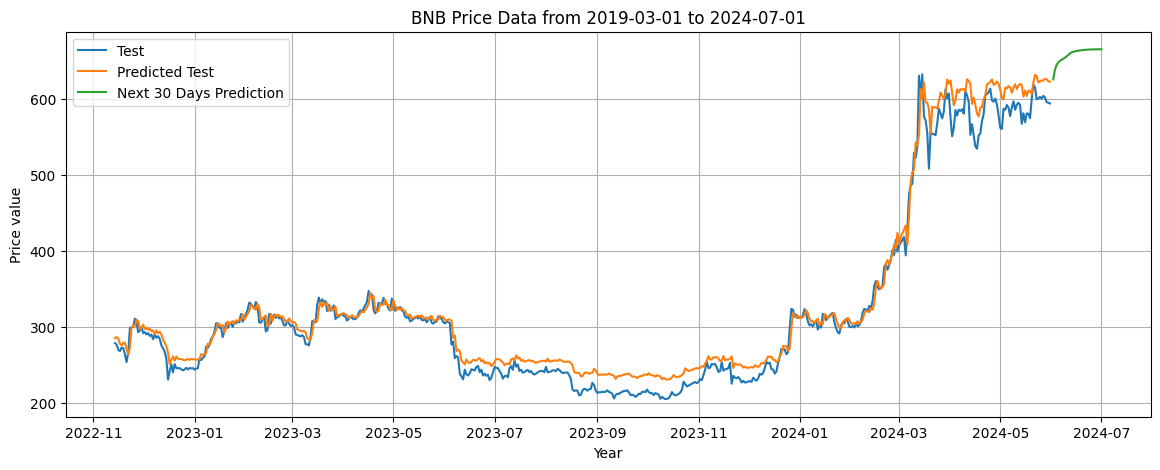

Predicted BNB prices for the next 60 days:
[625.5247469  638.03462974 644.38021788 647.74317515 649.80358807
 651.25035575 652.51563114 653.94088067 655.57848772 657.44985114
 659.37992212 660.75819764 661.6775518  662.31005028 662.77907443
 663.15685525 663.48229246 663.77332449 664.03420725 664.26307131
 664.45414933 664.60417978 664.71992438 664.80981537 664.88152929
 664.94015731 664.98888141 665.02980965 665.06381709 665.09213673
 665.11528565 665.13390024 665.14857713 665.16070844 665.17049303
 665.17844799 665.18497105 665.19038042 665.19487497 665.19869335
 665.20159691 665.20386407 665.20573349 665.20720515 665.20851772
 665.20971096 665.21050646 665.21106331 665.2116997  665.2123361
 665.21273385 665.21313159 665.21337024 665.21352934 665.21360889
 665.21384754 665.21404641 665.21392709 665.21400664 665.21408619]


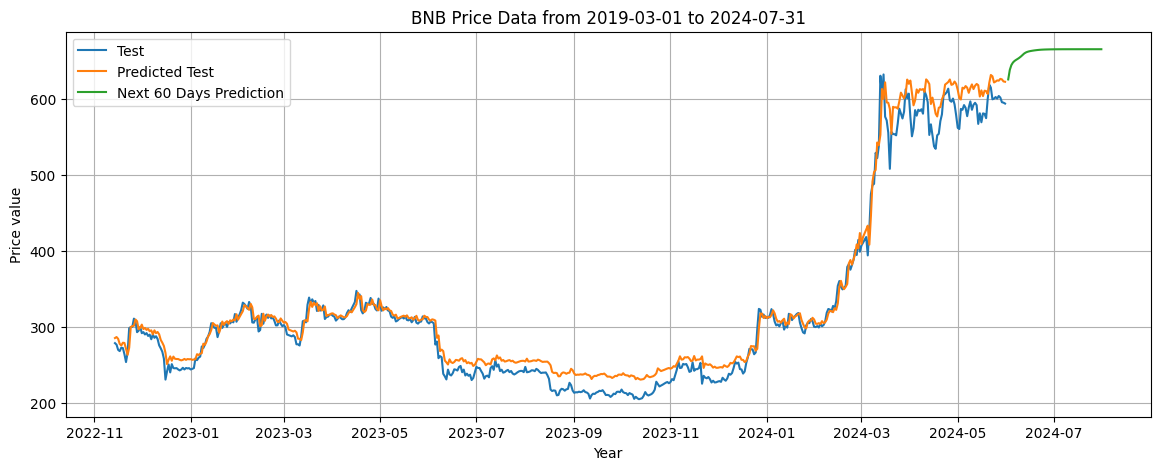

Predicted BNB prices for the next 90 days:
[625.5247469  638.03462974 644.38021788 647.74317515 649.80358807
 651.25035575 652.51563114 653.94088067 655.57848772 657.44985114
 659.37992212 660.75819764 661.6775518  662.31005028 662.77907443
 663.15685525 663.48229246 663.77332449 664.03420725 664.26307131
 664.45414933 664.60417978 664.71992438 664.80981537 664.88152929
 664.94015731 664.98888141 665.02980965 665.06381709 665.09213673
 665.11528565 665.13390024 665.14857713 665.16070844 665.17049303
 665.17844799 665.18497105 665.19038042 665.19487497 665.19869335
 665.20159691 665.20386407 665.20573349 665.20720515 665.20851772
 665.20971096 665.21050646 665.21106331 665.2116997  665.2123361
 665.21273385 665.21313159 665.21337024 665.21352934 665.21360889
 665.21384754 665.21404641 665.21392709 665.21400664 665.21408619
 665.21404641 665.21412596 665.21416574 665.21416574 665.21416574
 665.21416574 665.21408619 665.21400664 665.21412596 665.21408619
 665.21404641 665.21412596 665.214

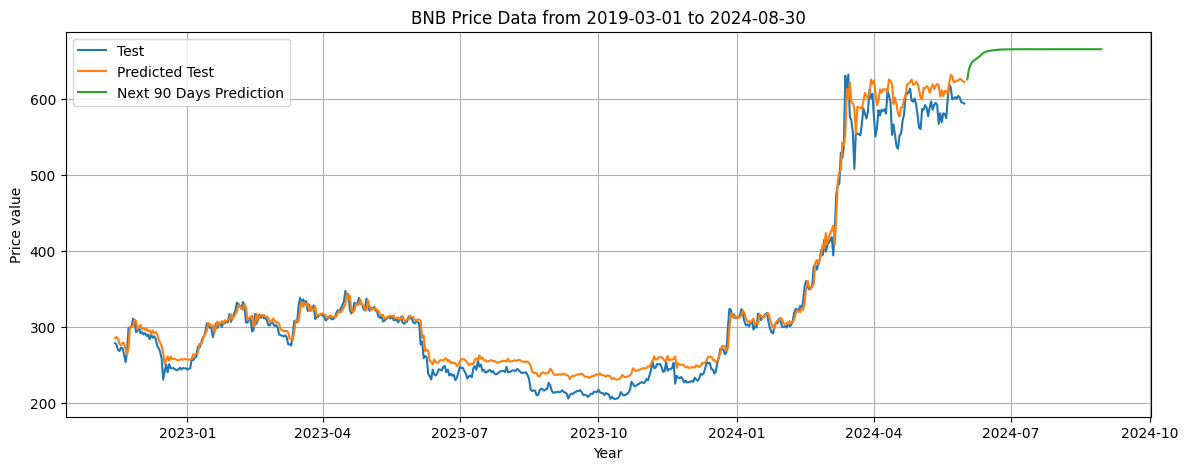

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Model
from keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Add

# Load data
df = pd.read_csv(r'/Users/khoanguyen/Downloads/BNB-Historical-Data.csv', on_bad_lines='skip', low_memory=False)
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
# Select the Close column as the dependent variable
df_Price = df[['Price']]
df_Price = df_Price.reset_index(drop=True)


# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Price))

# Function to create dataset for time series
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Set time step
time_step = 10

# Split data into train and test sets
train_size = int(0.7 * len(data_scaled))
test_size = len(data_scaled) - train_size
train_data, test_data = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:1]

# Create dataset for training and testing
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Define Pyraformer model
def pyraformer_model(input_shape, num_heads=2, ff_dim=32, num_layers=1, dropout=0.1):
    inputs = Input(shape=input_shape)
    
    # Initial embedding and positional encoding
    x = Dense(ff_dim)(inputs)
    
    for _ in range(num_layers):
        # Multi-head self-attention
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
        attn_output = Dropout(dropout)(attn_output)
        x = Add()([x, attn_output])
        x = LayerNormalization(epsilon=1e-6)(x)
        
        # Feedforward network
        ff_output = Dense(ff_dim, activation='relu')(x)
        ff_output = Dense(ff_dim)(ff_output)
        ff_output = Dropout(dropout)(ff_output)
        x = Add()([x, ff_output])
        x = LayerNormalization(epsilon=1e-6)(x)
    
    x = Dense(1)(x)
    outputs = x[:, -1, :]  # Take the last time step output
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (time_step, 1)
model = pyraformer_model(input_shape)

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict the closing prices for the test data
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Evaluate the accuracy of the test data
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSE on Test dataset: {test_mse}")

# The process of creating index to predict the next 30 days
last_index = len(df_Price) - 1

# Create an array of 30 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 30 days
lst_output = []
n_steps = time_step
i = 0
while(i < 30):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_30_days = scaler.inverse_transform(lst_output)



# Print the predicted closing prices for the next 30 days
print('Predicted BNB prices for the next 30 days:')
print(y_next_30_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_30_days, y_next_30_days, label='Next 30 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"BNB Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()

# The process of creating index to predict the next 60 days
last_index = len(df_Price) - 1

# Create an array of 60 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 60 days
lst_output = []
n_steps = time_step
i = 0
while(i < 60):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_60_days = scaler.inverse_transform(lst_output)


# Print the predicted closing prices for the next 60 days
print('Predicted BNB prices for the next 60 days:')
print(y_next_60_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_60_days, y_next_60_days, label='Next 60 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"BNB Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()

# The process of creating index to predict the next 90 days
last_index = len(df_Price) - 1

# Create an array of 90 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 90 days
lst_output = []
n_steps = time_step
i = 0
while(i < 90):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_90_days = scaler.inverse_transform(lst_output)


# Print the predicted closing prices for the next 90 days
print('Predicted BNB prices for the next 90 days:')
print(y_next_90_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 90 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_90_days, y_next_90_days, label='Next 90 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"BNB Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()